<a href="https://colab.research.google.com/github/ainurafifah00/Computer_Vision/blob/master/Intro_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is based on the tutorial by Machine Learning Mastery, 'Crash Course for Computer Vision'

##Normalizing Image data

Images are made up of matrices of pixels. Pixels are often integers in the range between 0 and 255. 

What we are doing in this phase is to normalize the value of the pixels so it will be presented in a value between 0 and 1.

This normalization method on the pixel values will reduce the computation time of the training model. 

In [1]:
from numpy import asarray
from PIL import Image
from IPython import display

!wget -O bondi_beach.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTeq1_pzpDttAN5jpbBTNzTCVfygogO4z-s2XYNxBT8d4sbaDmA&usqp=CAU 

--2020-04-09 05:36:54--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTeq1_pzpDttAN5jpbBTNzTCVfygogO4z-s2XYNxBT8d4sbaDmA
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 173.194.216.102, 173.194.216.100, 173.194.216.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|173.194.216.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9894 (9.7K) [image/jpeg]
Saving to: ‘bondi_beach.jpg’

bondi_beach.jpg     100%[===================>]   9.66K  --.-KB/s    in 0s      

2020-04-09 05:36:54 (85.4 MB/s) - ‘bondi_beach.jpg’ saved [9894/9894]



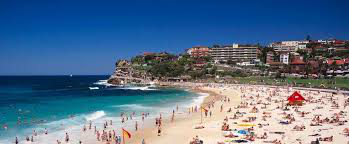

In [7]:
image = Image.open('bondi_beach.jpg')
image

In [8]:
pixels = asarray(image)

print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000


In [9]:
pixels = pixels.astype('float32') #convert integers into float32
pixels /= 255.0
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Min: 0.000, Max: 1.000


##Convolutional Neural Networks

Convolutional Neural Networks or CNN is constructed of Convolutional, Pooling and Classifier Layers. 

***Convolutional layers*** act as a filter for an input that results an activation. Repeated usage of this layer to an input results in a map of activations, which is also called a feature map. 

***Pooling layers*** downsample the feature maps by summarizing the presence of features in patches.

After the features are extracted, they can be interpreted and used to make prediction using ***classifier layer***. 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#create model
model = Sequential()

#add convolutional layer

model.add(Conv2D(32, (3,3), input_shape=(256, 256, 1)))  #This model expects grayscale images with square size 256x256 pixels,
                                                         #with one convolutional layer with 32 filters, each with 3x3 pixels
                                                         #with one binary output
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 246017    
Total params: 264,833
Trainable params: 264,833
Non-trainable params: 0
________________________________________________